# Importing Libraries


In [1066]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')


# Importing Dataset


In [1067]:
df = pd.read_csv('train_dataset.csv')
df.head()


,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


# Data Preprocessing


In [1068]:
df.shape


(4998, 32)

In [1069]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4998 non-null   int64
 1   Received Packets               4998 non-null   int64
 2   Received Bytes                 4998 non-null   int64
 3   Sent Bytes                     4998 non-null   int64
 4   Sent Packets                   4998 non-null   int64
 5   Port alive Duration (S)        4998 non-null   int64
 6   Packets Rx Dropped             4998 non-null   int64
 7   Packets Tx Dropped             4998 non-null   int64
 8   Packets Rx Errors              4998 non-null   int64
 9   Packets Tx Errors              4998 non-null   int64
 10  Delta Received Packets         4998 non-null   int64
 11  Delta Received Bytes           4998 non-null   int64
 12  Delta Sent Bytes               4998 non-null   int64
 13  Delta Sent Packets

In [1070]:
df.describe()


,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
count,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.0,4998.0,4998.0,4998.0,...,4.998000e+03,4.998000e+03,4.998000e+03,4998.0,4998.0,4998.000000,4.998000e+03,4.998000e+03,4998.0,4998.000000
mean,2.235094,83932.478191,4.721429e+07,4.743702e+07,148407.440176,1377.489996,0.0,0.0,0.0,0.0,...,2.354032e+04,5.956710e+05,2.354032e+04,1.0,0.0,54.488796,4.113947e+05,4.112736e+05,-1.0,1.157263
std,1.062464,122394.118041,4.951127e+07,4.894604e+07,149713.797741,984.424260,0.0,0.0,0.0,0.0,...,1.224342e+05,1.950752e+06,1.224342e+05,0.0,0.0,617.386958,3.889002e+05,3.888962e+05,0.0,1.448080
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.0,0.0,0.0,0.0,...,-6.303550e+05,0.000000e+00,-6.303550e+05,1.0,0.0,4.000000,1.050000e+02,5.000000e+01,-1.0,0.000000
25%,1.000000,836.500000,8.643970e+06,6.548716e+06,1042.250000,241.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,5.000000,6.826250e+03,6.661750e+03,-1.0,0.000000
50%,2.000000,3595.500000,2.559362e+07,2.977196e+07,134206.500000,1385.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,6.000000,5.122400e+05,5.121590e+05,-1.0,0.000000
75%,3.000000,178957.750000,7.572793e+07,7.609763e+07,287707.500000,2237.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,7.000000,6.659060e+05,6.657710e+05,-1.0,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,1.746749e+06,1.891030e+07,1.746749e+06,1.0,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0,5.000000


In [1071]:
df.isnull().sum()


Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries              0
Packets Looked Up   

In [1072]:
# drop all the columns with zero values
df = df.drop(['Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors', 'Delta Packets Rx Dropped',
             ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors', 'Delta Packets Tx Errors', 'Table ID'], axis=1)


<Axes: >

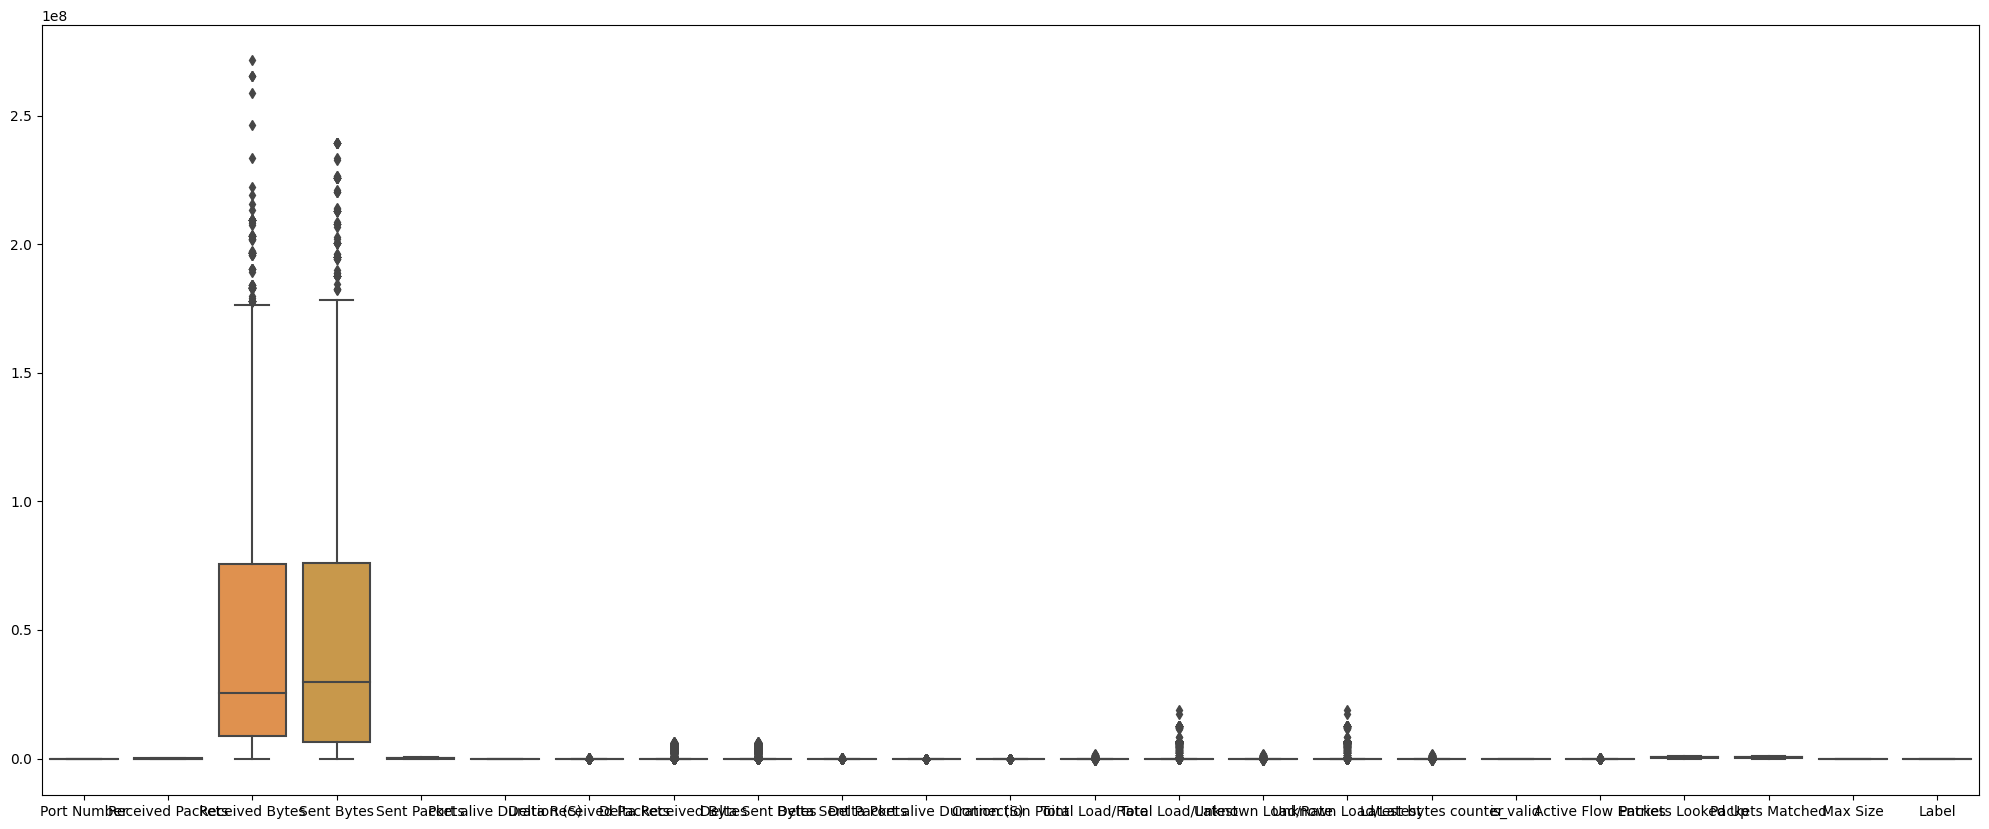

In [1073]:
# increase the size of the plot
plt.figure(figsize=(25, 10))
sns.boxplot(df)


In [1074]:
df.columns


Index(['Port Number', 'Received Packets', 'Received Bytes', 'Sent Bytes',
       'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label'],
      dtype='object')

# Big Data Analytics Insight


In [1075]:
# the sns pairplot is a very useful tool to visualize the relationship between all the features in the dataset
plt.title('Pairplot of the dataset')
sns.pairplot(df, hue='Label')
plt.show()


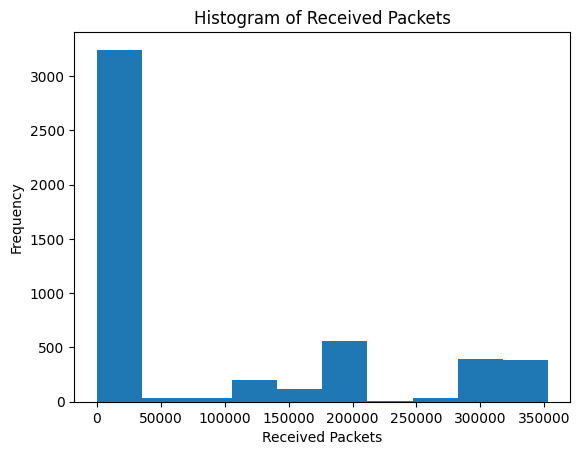

In [1076]:
# plot the histogram of the received packets column to see the distribution of the data in this column
plt.hist(df['Received Packets'], bins=10)
plt.xlabel('Received Packets')
plt.ylabel('Frequency')
plt.title('Histogram of Received Packets')
plt.show()


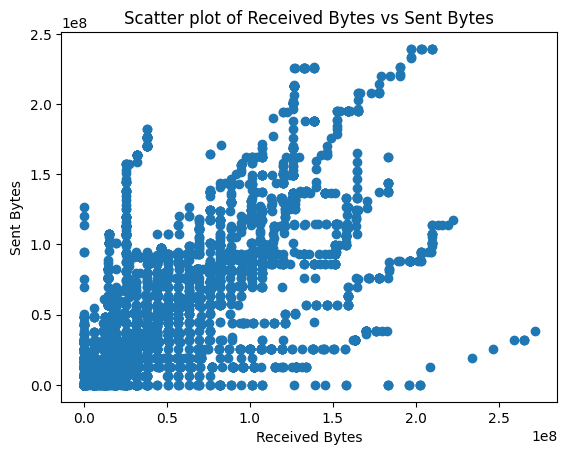

In [1077]:
# plot the scatter plot of the received packets column vs the sent packets column to see the relationship between the two columns
plt.scatter(df['Received Bytes'], df['Sent Bytes'])
plt.xlabel('Received Bytes')
plt.ylabel('Sent Bytes')
plt.title('Scatter plot of Received Bytes vs Sent Bytes')
plt.show()


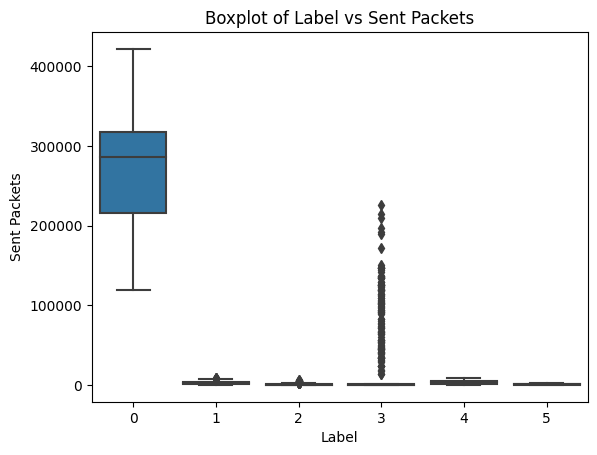

In [1078]:
# plot the boxplot of the label column vs the received packets column to see the relationship between the two columns
sns.boxplot(x='Label', y='Sent Packets', data=df)
plt.xlabel('Label')
plt.ylabel('Sent Packets')
plt.title('Boxplot of Label vs Sent Packets')
plt.show()


<Axes: title={'center': 'Heatmap of Correlation Matrix'}>

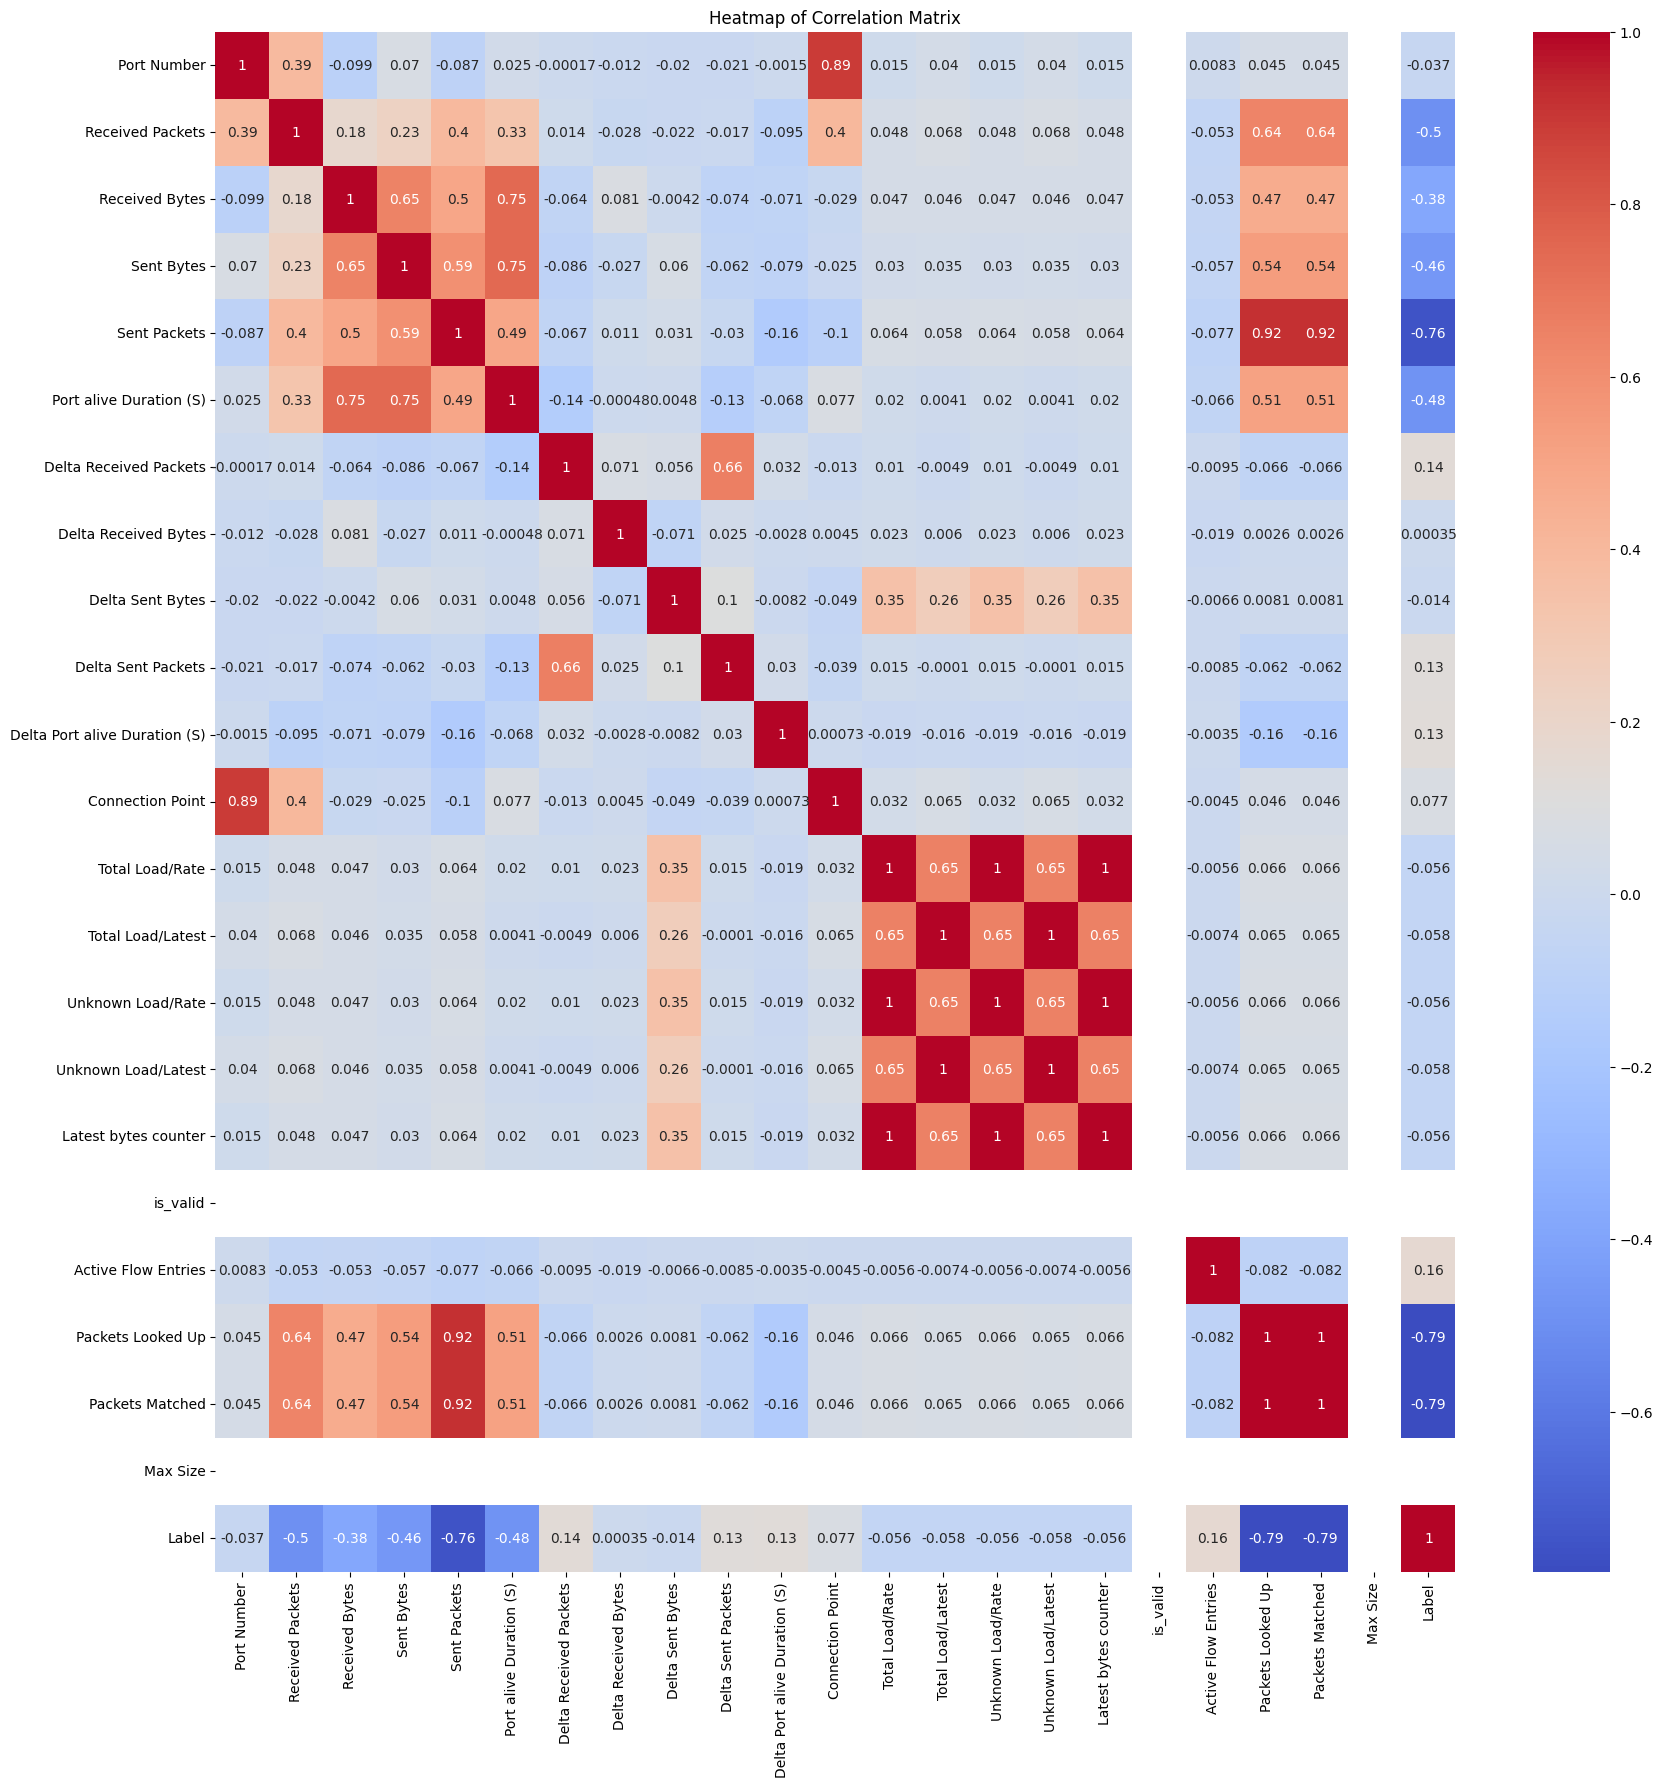

In [1079]:
# plot the heatmap of the correlation matrix of the dataset to see the correlation between the features in the dataset
corr = df.corr()
plt.figure(figsize=(20, 20))
plt.title('Heatmap of Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')


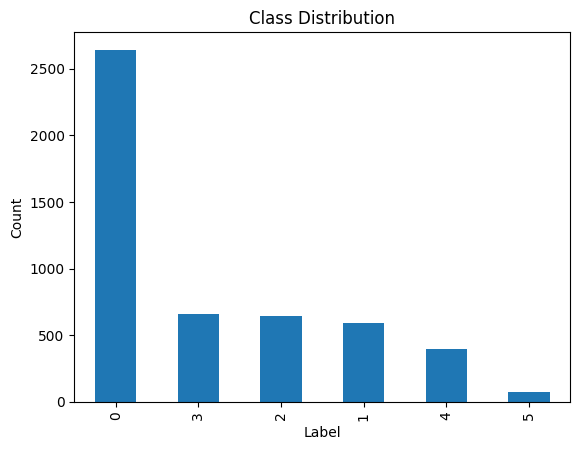

In [1080]:
# class distribution of the dataset to see if the dataset is balanced or not
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


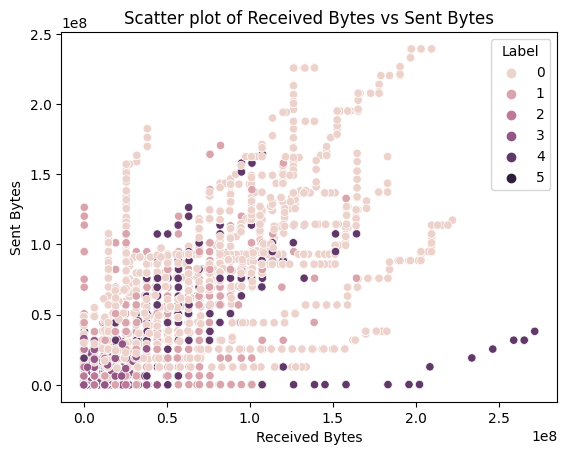

In [1081]:
# plot the scatter plot of the received bytes column vs the sent bytes column to see the relationship between the two columns
plt.title('Scatter plot of Received Bytes vs Sent Bytes')
sns.scatterplot(x='Received Bytes', y='Sent Bytes', hue='Label', data=df)
plt.show()


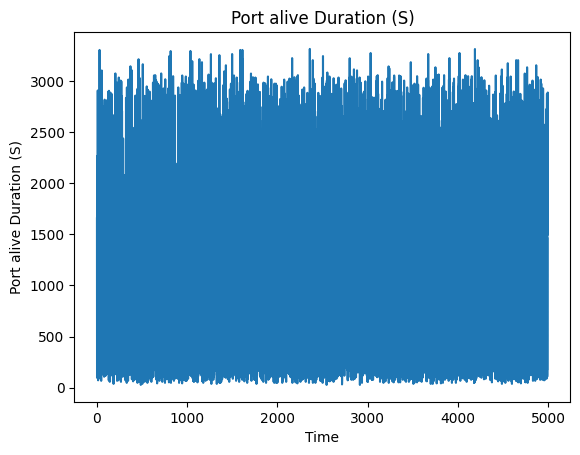

In [1082]:
# port alive duration vs time plot to see the relationship between the two columns
df['Port alive Duration (S)'].plot()
plt.title('Port alive Duration (S)')
plt.xlabel('Time')
plt.ylabel('Port alive Duration (S)')
plt.show()


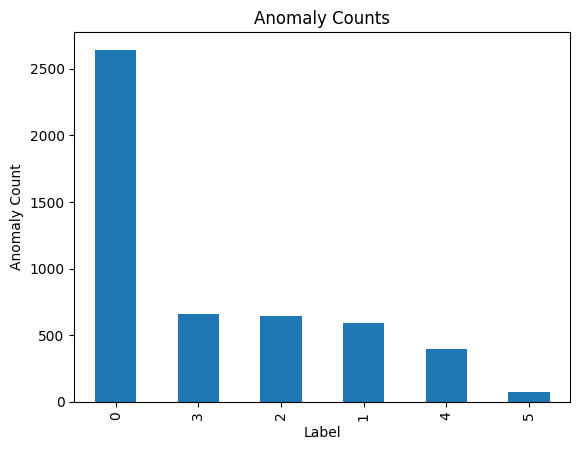

In [1083]:
# plot the anomaly counts to see the number of anomalies in the dataset
anomaly_counts = df['Label'].value_counts()
anomaly_counts.plot(kind='bar')
plt.title('Anomaly Counts')
plt.xlabel('Label')
plt.ylabel('Anomaly Count')
plt.show()


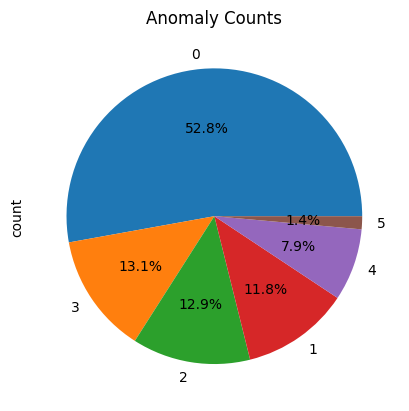

In [1084]:
# plot the anomaly counts to see the number of anomalies in the dataset
plt.title('Anomaly Counts')
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


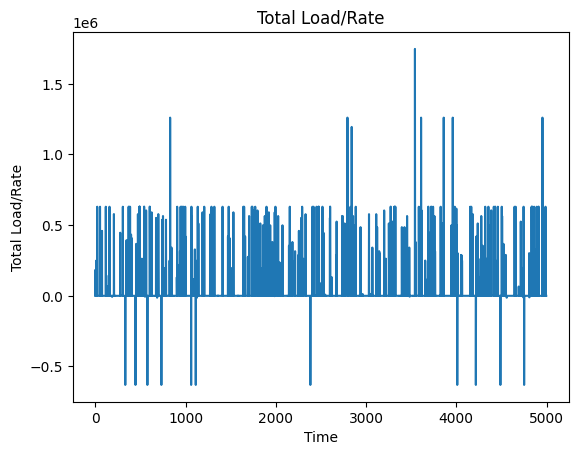

In [1085]:
# plot the total load/rate to see the relationship between the two columns
df['Total Load/Rate'].plot()
plt.title('Total Load/Rate')
plt.xlabel('Time')
plt.ylabel('Total Load/Rate')
plt.show()


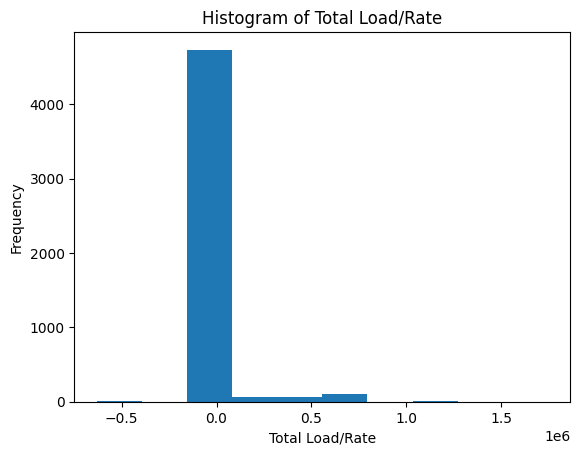

In [1086]:
# plot the histogram of the total load/rate column to see the distribution of the data in this column
df['Total Load/Rate'].plot(kind='hist')
plt.title('Histogram of Total Load/Rate')
plt.xlabel('Total Load/Rate')
plt.ylabel('Frequency')
plt.show()


# Training and Splitting Data set into Test and Train


In [1087]:
# apply different classification algorithms to the dataset
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Different Classification Model


### Logistic Regression


In [1088]:
from sklearn.linear_model import LogisticRegression

# create the logistic regression model
log_reg = LogisticRegression()

# fit the model to the training data
log_reg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = log_reg.predict(X_test)

In [1089]:
# print the accuracy score of the model
print('Accuracy score of the logistic regression model: ',
      accuracy_score(y_test, y_pred)*100)

lr_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the logistic regression model: ', mean_squared_error( y_test, y_pred)*100)

lr_mse = mean_squared_error(y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the logistic regression model: ', mean_absolute_error( y_test, y_pred)*100)

lr_mae = mean_absolute_error(y_test, y_pred)

Accuracy score of the logistic regression model:  65.0
Mean squared error of the logistic regression model:  211.3
Mean absolute error of the logistic regression model:  80.10000000000001


In [1090]:
# print the confusion matrix of the model
print('Confusion matrix of the logistic regression model: \n',
      confusion_matrix(y_test, y_pred))


Confusion matrix of the logistic regression model: 
 [[520   0   0   0   0   0]
 [  9  35   3   8  67   0]
 [ 36  25  19  14  33   0]
 [ 71  17   2  18  22   0]
 [  6  18   1   4  58   0]
 [  4   2   1   2   5   0]]


In [1091]:
# print the classification report of the model
print('Classification report of the logistic regression model: \n',
      classification_report(y_test, y_pred))


Classification report of the logistic regression model: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       520
           1       0.36      0.29      0.32       122
           2       0.73      0.15      0.25       127
           3       0.39      0.14      0.20       130
           4       0.31      0.67      0.43        87
           5       0.00      0.00      0.00        14

    accuracy                           0.65      1000
   macro avg       0.43      0.37      0.35      1000
weighted avg       0.63      0.65      0.60      1000



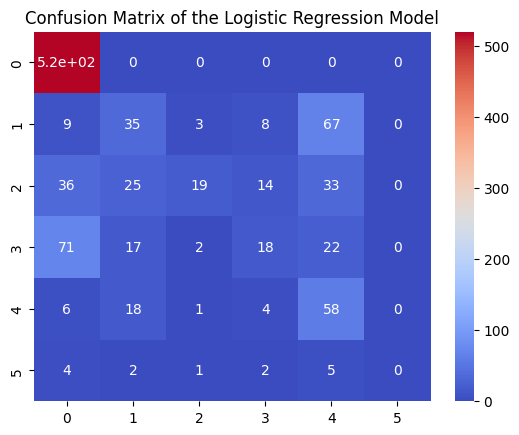

In [1092]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the Logistic Regression Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()


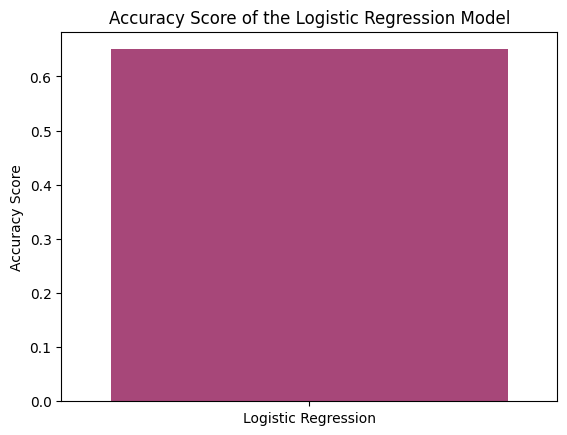

In [1093]:
# plot the acc score of the model
plt.title('Accuracy Score of the Logistic Regression Model')
sns.barplot(x=['Logistic Regression'], y=[lr_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()
 

### Decision Tree Classifier


In [1094]:
from sklearn.tree import DecisionTreeClassifier

# create the decision tree classifier model
dtc = DecisionTreeClassifier()

# fit the model to the training data
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)


In [1095]:
# print the accuracy score of the model
print('Accuracy score of the logistic regression model: ',
      accuracy_score(y_test, y_pred)*100)

dt_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the logistic regression model: ', mean_squared_error( y_test, y_pred)*100)

dt_mse = mean_squared_error(y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the logistic regression model: ', mean_absolute_error( y_test, y_pred)*100)

dt_mae = mean_absolute_error(y_test, y_pred)

Accuracy score of the logistic regression model:  92.7
Mean squared error of the logistic regression model:  19.3
Mean absolute error of the logistic regression model:  10.299999999999999


In [1096]:
# print the confusion matrix of the model
print('Confusion matrix of the decision tree classifier model: \n',
      confusion_matrix(y_test, y_pred))


Confusion matrix of the decision tree classifier model: 
 [[520   0   0   0   0   0]
 [  0 114   3   1   3   1]
 [  0   3 100  23   0   1]
 [  0   4  16 107   2   1]
 [  0   2   0   6  79   0]
 [  0   1   3   0   3   7]]


In [1097]:
# print the classification report of the model
print('Classification report of the decision tree classifier model: \n',
      classification_report(y_test, y_pred))


Classification report of the decision tree classifier model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       0.92      0.93      0.93       122
           2       0.82      0.79      0.80       127
           3       0.78      0.82      0.80       130
           4       0.91      0.91      0.91        87
           5       0.70      0.50      0.58        14

    accuracy                           0.93      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.93      0.93      0.93      1000



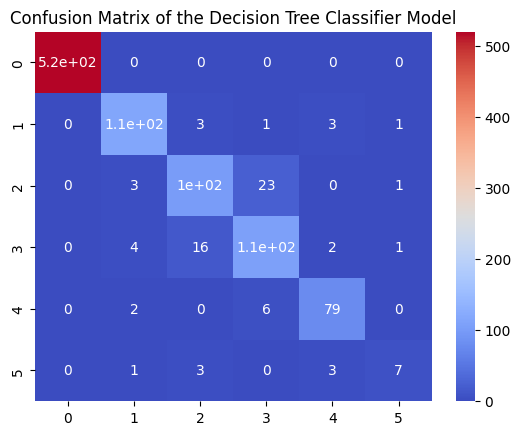

In [1098]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the Decision Tree Classifier Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()


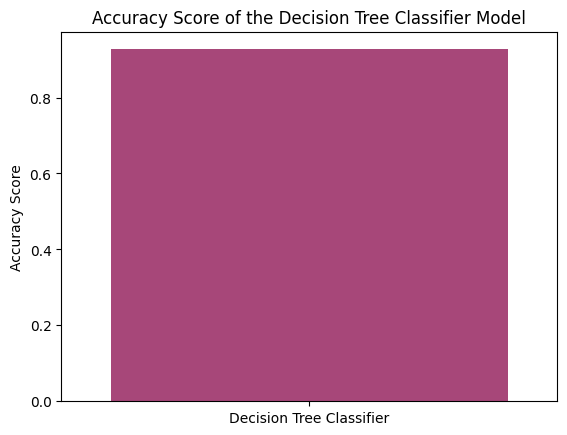

In [1099]:
# plot the acc score of the model
plt.title('Accuracy Score of the Decision Tree Classifier Model')
sns.barplot(x=['Decision Tree Classifier'], y=[dt_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()

### K Neighbors Classifier



In [1100]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier model
knn = KNeighborsClassifier()

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)


In [1101]:
# print the accuracy score of the model
print('Accuracy score of the logistic regression model: ',
      accuracy_score(y_test, y_pred)*100)

kn_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the logistic regression model: ', mean_squared_error( y_test, y_pred)*100)

kn_mse = mean_squared_error( y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the logistic regression model: ', mean_absolute_error( y_test, y_pred)*100)

kn_mae = mean_absolute_error( y_test, y_pred)

Accuracy score of the logistic regression model:  74.2
Mean squared error of the logistic regression model:  149.10000000000002
Mean absolute error of the logistic regression model:  53.900000000000006


In [1102]:
# print the confusion matrix of the model
print('Confusion matrix of the KNN classifier model: \n',
      confusion_matrix(y_test, y_pred))


Confusion matrix of the KNN classifier model: 
 [[505   7   1   3   4   0]
 [ 36  47  12   6  21   0]
 [  2   9  92  21   2   1]
 [ 11  15  31  71   2   0]
 [ 35  17   3   6  26   0]
 [  1   5   4   2   1   1]]


In [1103]:
# print the classification report of the model
print('Classification report of the KNN classifier model: \n',
      classification_report(y_test, y_pred))


Classification report of the KNN classifier model: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       520
           1       0.47      0.39      0.42       122
           2       0.64      0.72      0.68       127
           3       0.65      0.55      0.59       130
           4       0.46      0.30      0.36        87
           5       0.50      0.07      0.12        14

    accuracy                           0.74      1000
   macro avg       0.60      0.50      0.52      1000
weighted avg       0.72      0.74      0.72      1000



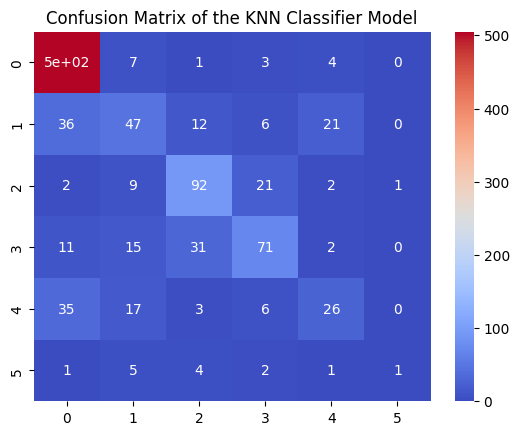

In [1104]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the KNN Classifier Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()


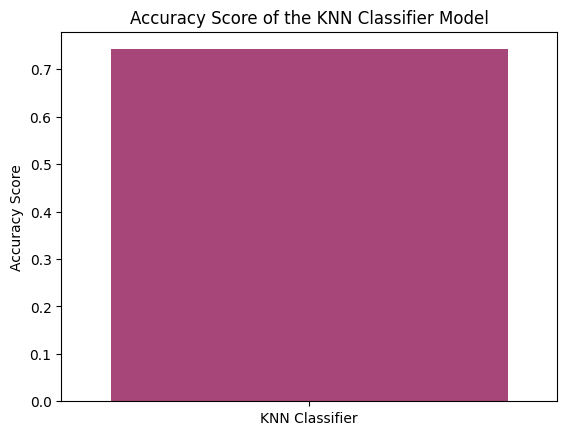

In [1105]:
# plot the acc score of the model
plt.title('Accuracy Score of the KNN Classifier Model')
sns.barplot(x=['KNN Classifier'], y=[kn_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()

### Support Vector Machine


In [1106]:
from sklearn.svm import SVC

# create the SVM classifier model
svc = SVC()

# fit the model to the training data
svc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = svc.predict(X_test)


In [1107]:
# print the accuracy score of the model
print('Accuracy score of the logistic regression model: ',
      accuracy_score(y_test, y_pred)*100)

svm_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the logistic regression model: ', mean_squared_error( y_test, y_pred)*100)

svm_mse = mean_squared_error( y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the logistic regression model: ', mean_absolute_error( y_test, y_pred)*100)

svm_mae = mean_absolute_error( y_test, y_pred)

Accuracy score of the logistic regression model:  64.2
Mean squared error of the logistic regression model:  195.2
Mean absolute error of the logistic regression model:  71.39999999999999


In [1108]:
# print the confusion matrix of the model
print('Confusion matrix of the SVM classifier model: \n',
      confusion_matrix(y_test, y_pred))


Confusion matrix of the SVM classifier model: 
 [[497   0   3  20   0   0]
 [ 81   0  24  17   0   0]
 [  7   0 109  11   0   0]
 [ 27   0  74  29   0   0]
 [ 64   0  11   5   7   0]
 [  2   0  12   0   0   0]]


In [1109]:
# print the classification report of the model
print('Classification report of the SVM classifier model: \n',
      classification_report(y_test, y_pred))


Classification report of the SVM classifier model: 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       520
           1       0.00      0.00      0.00       122
           2       0.47      0.86      0.61       127
           3       0.35      0.22      0.27       130
           4       1.00      0.08      0.15        87
           5       0.00      0.00      0.00        14

    accuracy                           0.64      1000
   macro avg       0.43      0.35      0.31      1000
weighted avg       0.57      0.64      0.56      1000



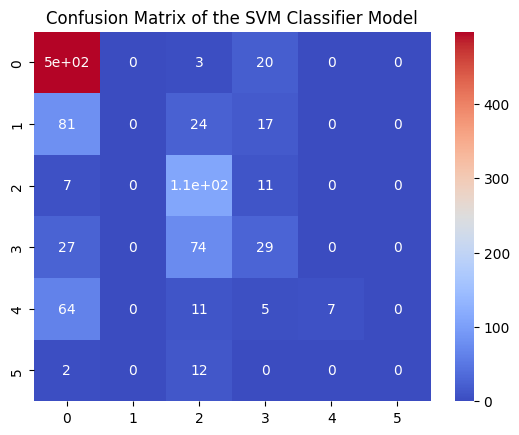

In [1110]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the SVM Classifier Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()


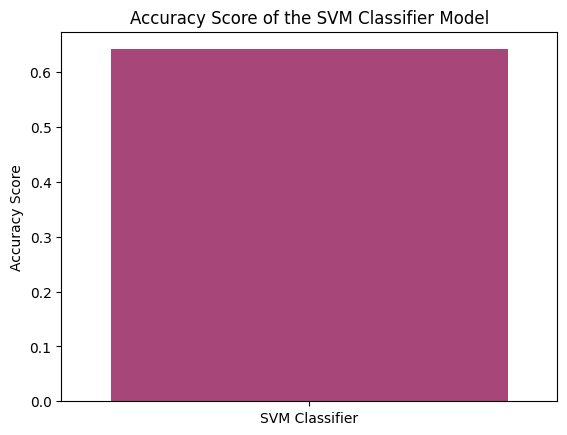

In [1111]:
# plot the acc score of the model
plt.title('Accuracy Score of the SVM Classifier Model')
sns.barplot(x=['SVM Classifier'], y=[svm_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()
 

### Random Forest Classifier


In [1112]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

In [1113]:
# print the accuracy score of the model
print('Accuracy score of the logistic regression model: ',
      accuracy_score(y_test, y_pred)*100)

rf_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the logistic regression model: ', mean_squared_error( y_test, y_pred)*100)

rf_mse = mean_squared_error( y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the logistic regression model: ', mean_absolute_error( y_test, y_pred)*100)

rf_mae = mean_absolute_error( y_test, y_pred)

Accuracy score of the logistic regression model:  94.39999999999999
Mean squared error of the logistic regression model:  21.2
Mean absolute error of the logistic regression model:  9.4


In [1114]:
# print the confusion matrix of the model
print('Confusion matrix of the random forest classifier model: \n',
      confusion_matrix(y_test, y_pred))


Confusion matrix of the random forest classifier model: 
 [[520   0   0   0   0   0]
 [  0 117   3   0   2   0]
 [  0   0 110  17   0   0]
 [  0   0  10 120   0   0]
 [  0   4   3   5  75   0]
 [  0   3   6   2   1   2]]


In [1115]:
# print the classification report of the model
print('Classification report of the random forest classifier model: \n',
      classification_report(y_test, y_pred))


Classification report of the random forest classifier model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       0.94      0.96      0.95       122
           2       0.83      0.87      0.85       127
           3       0.83      0.92      0.88       130
           4       0.96      0.86      0.91        87
           5       1.00      0.14      0.25        14

    accuracy                           0.94      1000
   macro avg       0.93      0.79      0.81      1000
weighted avg       0.95      0.94      0.94      1000



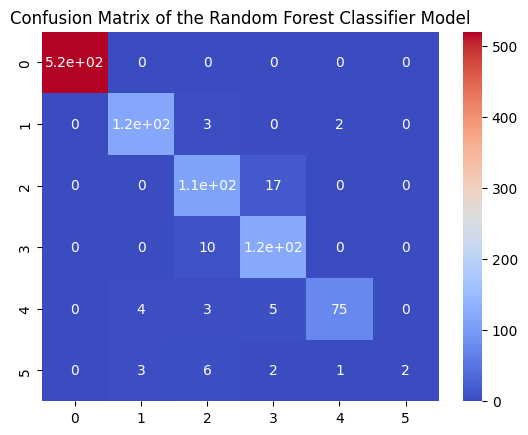

In [1116]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the Random Forest Classifier Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()


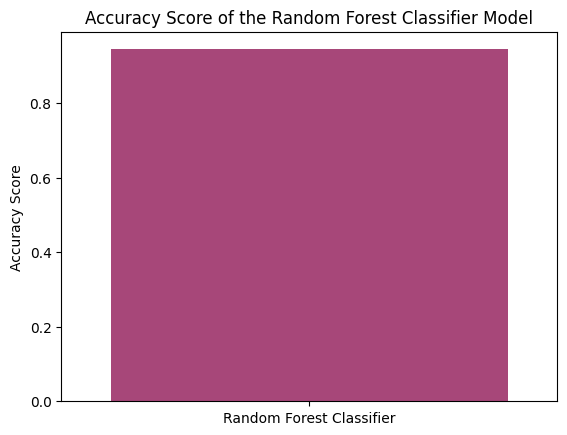

In [1117]:
# plot the acc score of the model
plt.title('Accuracy Score of the Random Forest Classifier Model')
sns.barplot(x=['Random Forest Classifier'], y=[rf_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()
 

# Comparison

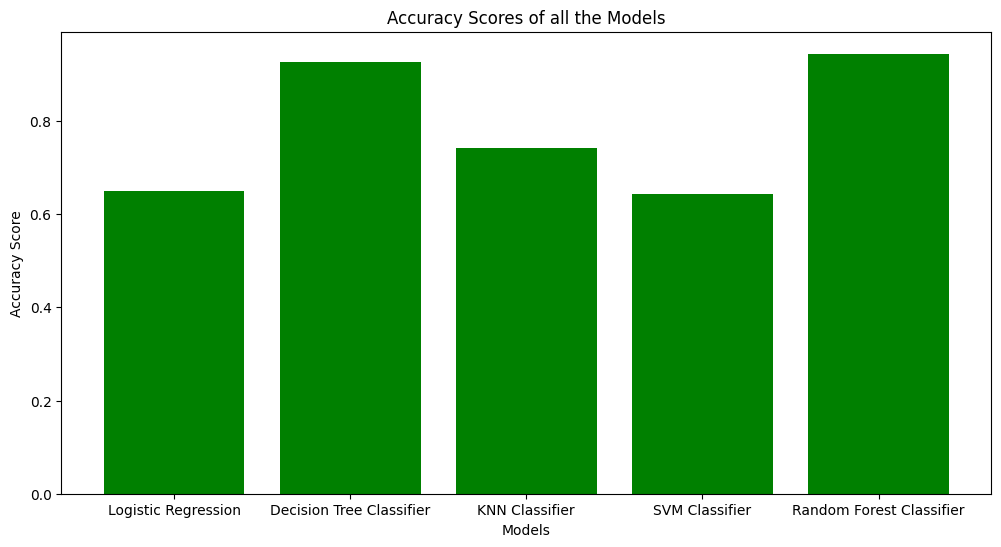

In [1118]:
# plot the accuracy scores of all the models and compare them
plt.figure(figsize=(12, 6))
plt.title('Accuracy Scores of all the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_acc, dt_acc, kn_acc, svm_acc, rf_acc], color='green')
plt.show()

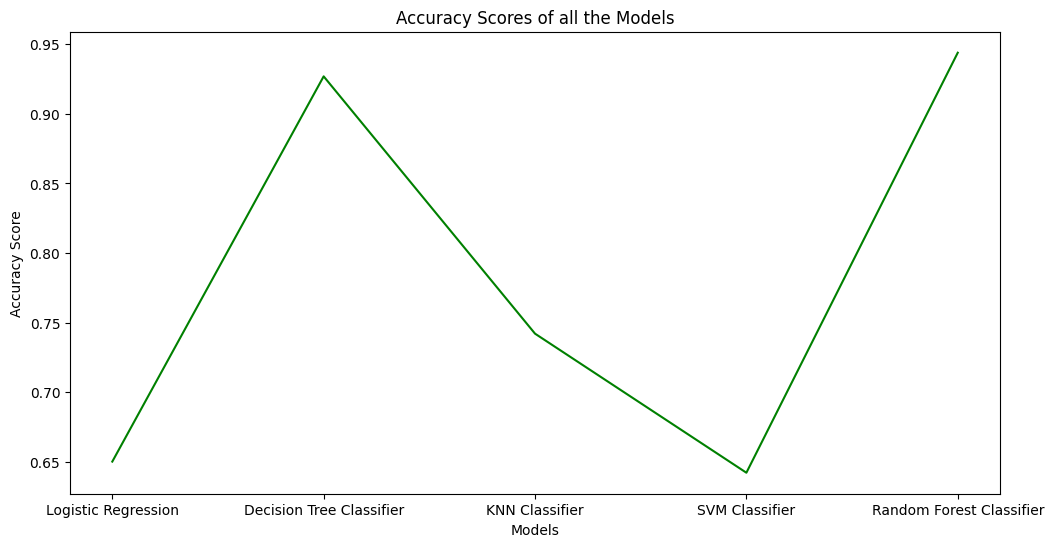

In [1119]:
# plot a line graph to compare the accuracy scores of all the models
plt.figure(figsize=(12, 6))
plt.title('Accuracy Scores of all the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.plot(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_acc, dt_acc, kn_acc, svm_acc, rf_acc], color='green')
plt.show()


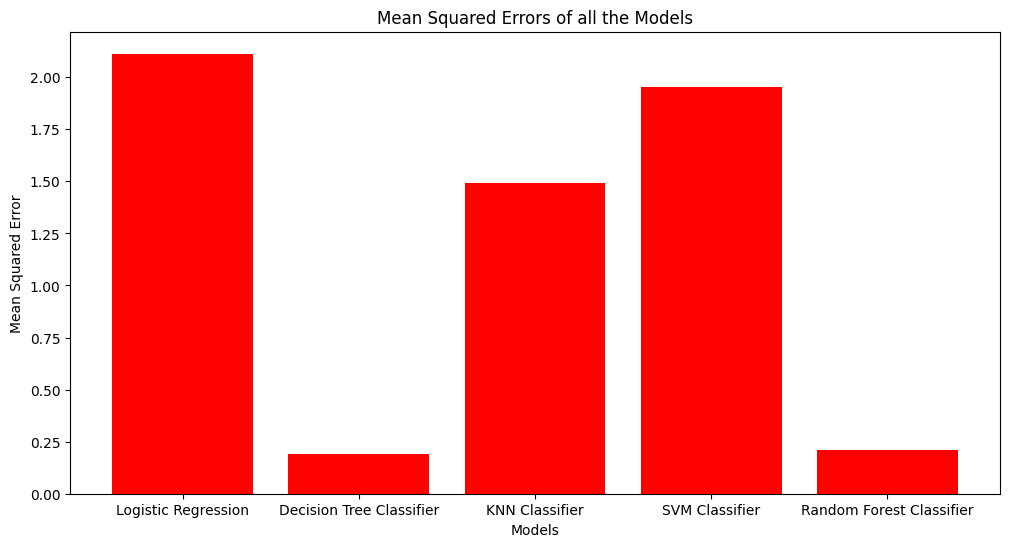

In [1120]:
# plot the mean squared errors of all the models and compare them
plt.figure(figsize=(12, 6))
plt.title('Mean Squared Errors of all the Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.bar(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_mse, dt_mse, kn_mse, svm_mse, rf_mse], color='red')
plt.show()

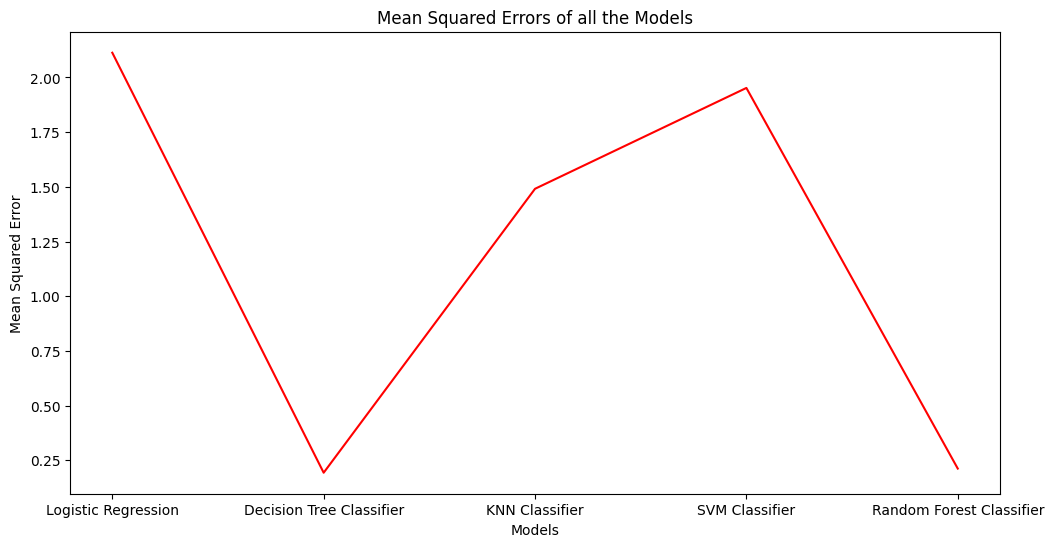

In [1121]:
# plot a line graph to compare the mean squared errors of all the models
plt.figure(figsize=(12, 6))
plt.title('Mean Squared Errors of all the Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.plot(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_mse, dt_mse, kn_mse, svm_mse, rf_mse], color='red')
plt.show()

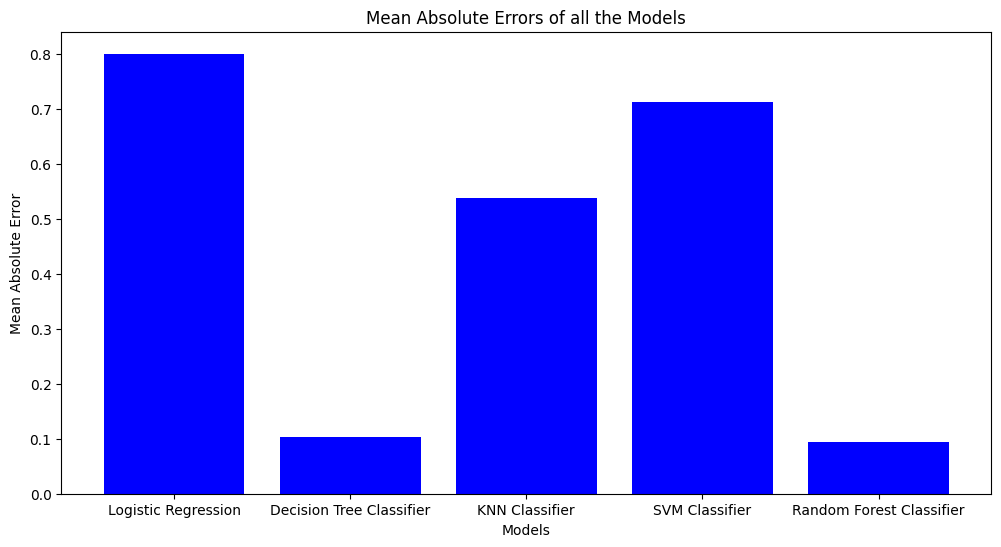

In [1122]:
# plot the mean absolute errors of all the models and compare them
plt.figure(figsize=(12, 6))
plt.title('Mean Absolute Errors of all the Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.bar(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_mae, dt_mae, kn_mae, svm_mae, rf_mae], color='blue')
plt.show()

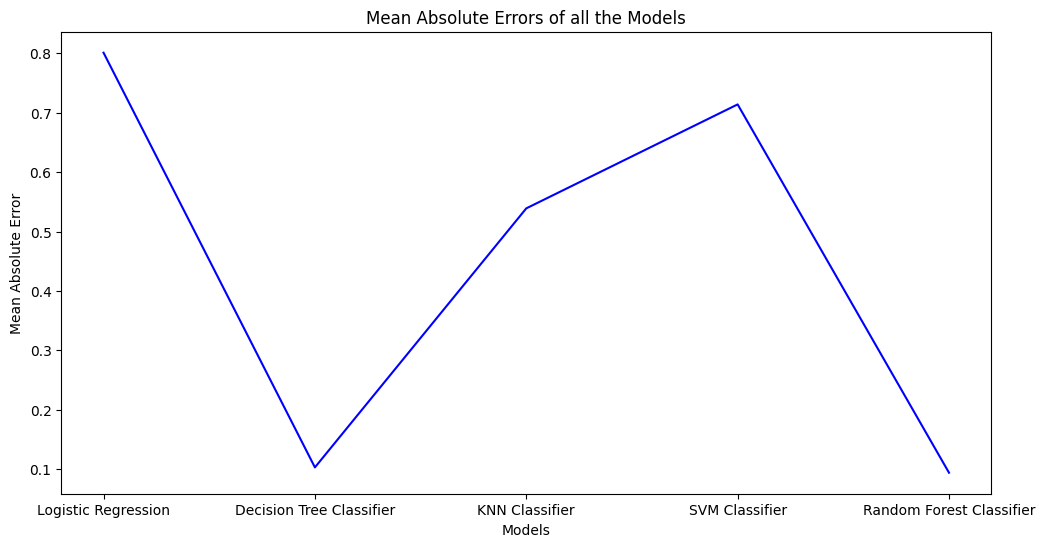

In [1123]:
# plot a line graph to compare the mean absolute errors of all the models
plt.figure(figsize=(12, 6))
plt.title('Mean Absolute Errors of all the Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.plot(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier'],
        [lr_mae, dt_mae, kn_mae, svm_mae, rf_mae], color='blue')
plt.show()

# Deep Learning

In [1124]:
# aply neural network
from sklearn.neural_network import MLPClassifier
 
# create the neural network model
mlp = MLPClassifier( hidden_layer_sizes=(40, 20, 10), max_iter=1000, activation='relu', solver='adam', random_state=42)
 
# fit the model to the training data
mlp.fit(X_train, y_train)

# make predictions on the testing data
y_pred = mlp.predict(X_test)

In [1125]:
# print the accuracy score of the model
print('Accuracy score of the neural network model: ',
        accuracy_score(y_test, y_pred)*100)

mlp_acc = accuracy_score(y_test, y_pred)

# print mean squared error of the model
print('Mean squared error of the neural network model: ', mean_squared_error( y_test, y_pred)*100)
 
mlp_mse = mean_squared_error( y_test, y_pred)

# print mean absolute error of the model
print('Mean absolute error of the neural network model: ', mean_absolute_error( y_test, y_pred)*100)

mlp_mae = mean_absolute_error( y_test, y_pred)

Accuracy score of the neural network model:  64.0
Mean squared error of the neural network model:  194.0
Mean absolute error of the neural network model:  75.8


In [1126]:
# print the confusion matrix of the model
print('Confusion matrix of the neural network model: \n', confusion_matrix(y_test, y_pred))

Confusion matrix of the neural network model: 
 [[512   0   6   2   0   0]
 [ 12  30   7  11  61   1]
 [ 28  19  24  44  12   0]
 [ 49  17  29  28   6   1]
 [  9  18   4  10  46   0]
 [  3   5   0   2   4   0]]


In [1127]:
# print the classification report of the model
print('Classification report of the neural network model: \n', classification_report(y_test, y_pred))

Classification report of the neural network model: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       520
           1       0.34      0.25      0.28       122
           2       0.34      0.19      0.24       127
           3       0.29      0.22      0.25       130
           4       0.36      0.53      0.43        87
           5       0.00      0.00      0.00        14

    accuracy                           0.64      1000
   macro avg       0.36      0.36      0.35      1000
weighted avg       0.59      0.64      0.60      1000



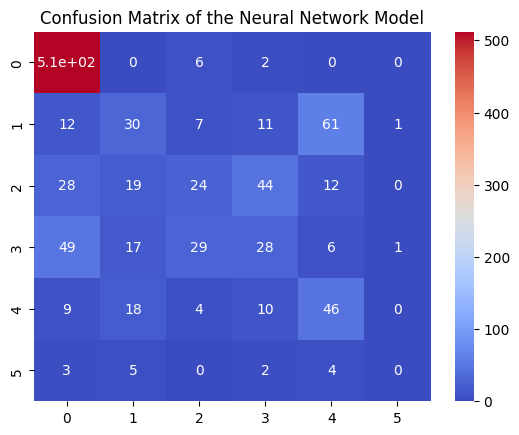

In [1128]:
# plot the confusion matrix of the model
plt.title('Confusion Matrix of the Neural Network Model')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.show()

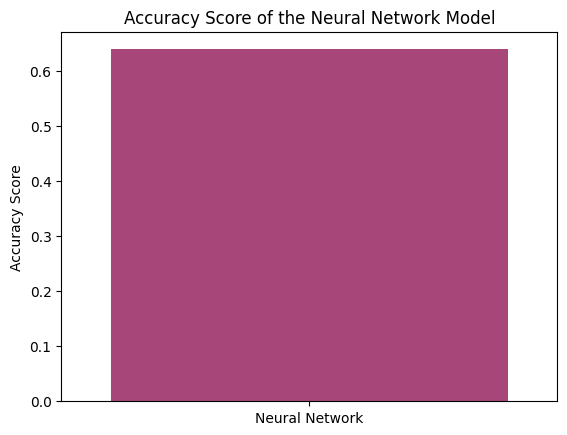

In [1129]:
# plot the acc score of the model
plt.title('Accuracy Score of the Neural Network Model')
sns.barplot(x=['Neural Network'], y=[mlp_acc], palette='magma')
plt.ylabel('Accuracy Score')
plt.show()


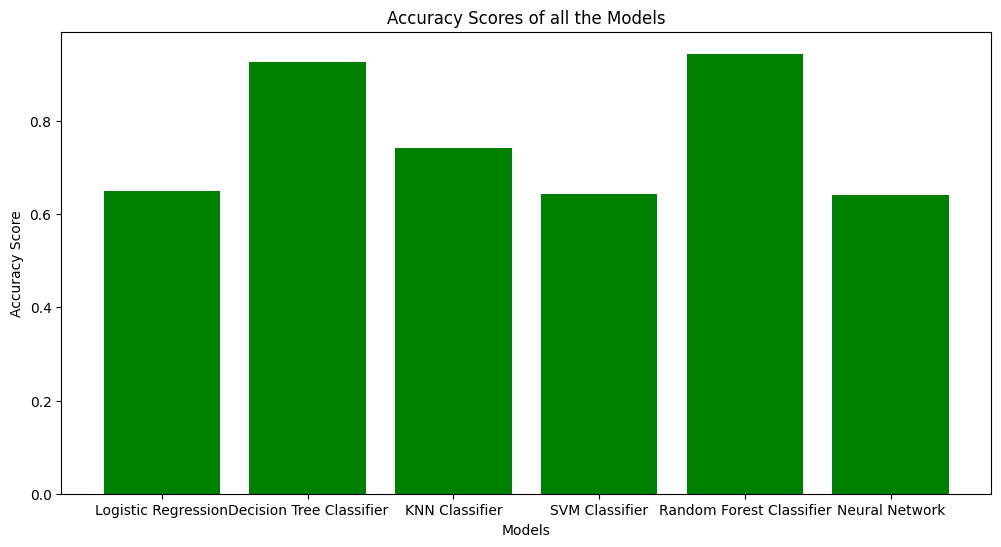

In [1130]:
# plot the accuracy scores of all the models and compare them
plt.figure(figsize=(12, 6))
plt.title('Accuracy Scores of all the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier', 'Neural Network'],
        [lr_acc, dt_acc, kn_acc, svm_acc, rf_acc, mlp_acc], color='green')
plt.show()

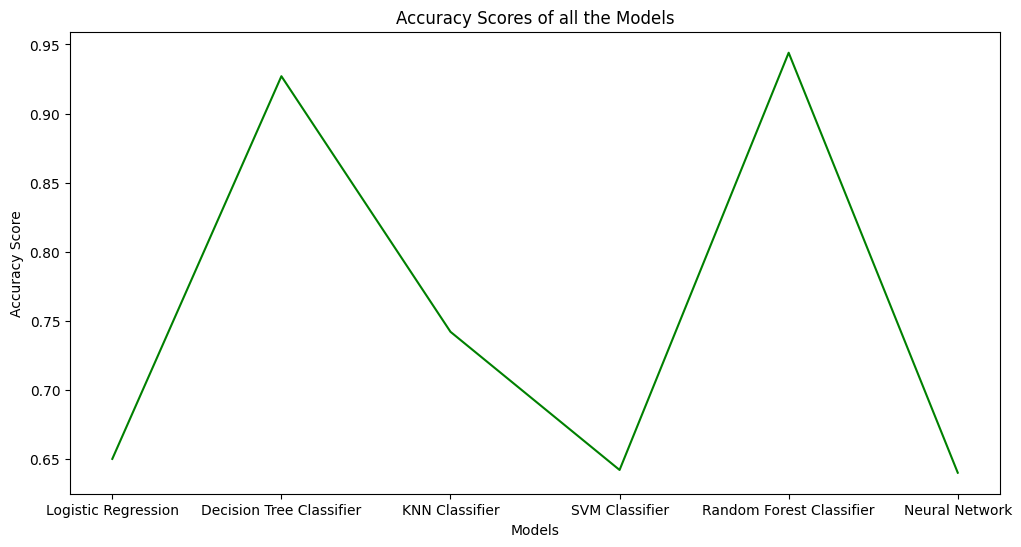

In [1131]:
# plot a line graph to compare the accuracy scores of all the models
plt.figure(figsize=(12, 6))
plt.title('Accuracy Scores of all the Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.plot(['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'SVM Classifier', 'Random Forest Classifier', 'Neural Network'],
        [lr_acc, dt_acc, kn_acc, svm_acc, rf_acc, mlp_acc], color='green')
plt.show()